In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
%matplotlib inline

# Bias in estimation of parameters

Linear regression -- the estimates are unbiased

i.e. 

$\mathbb{E}[\hat{\theta_0}] = \theta_0$

$\mathbb{E}[\hat{\theta_1}] = \theta_1$

### Linear true function (f)

In [2]:
N = 100

x = jnp.linspace(-1, 1, N)
f = 4*x + 2
eps = jax.random.normal(jax.random.PRNGKey(1), (N,))
y = f + eps

In [3]:
eps.mean()

DeviceArray(-0.04287745, dtype=float32)

Important caveat: `eps.mean()` is not 0. We often assume noise has expectation 0. That is not true in our small scale simulations.

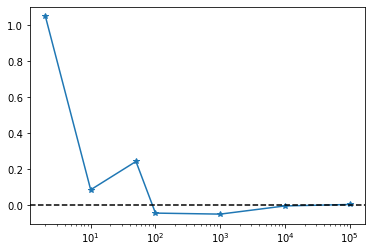

In [4]:
eps_means = {}
for n in [2, 10, 50, 100, 1000, 10000, 100000]:
    eps_means[n] = jax.random.normal(jax.random.PRNGKey(1), (n,)).mean().item()

pd.Series(eps_means).plot(logx=True, marker='*')
plt.axhline(0, color='k', linestyle='--')

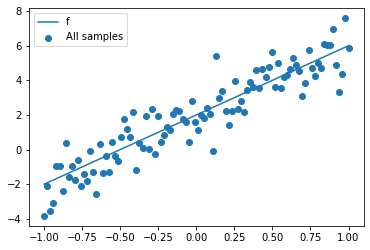

In [5]:
plt.plot(x, f, label='f')
plt.scatter(x, y, label='All samples')
plt.legend()

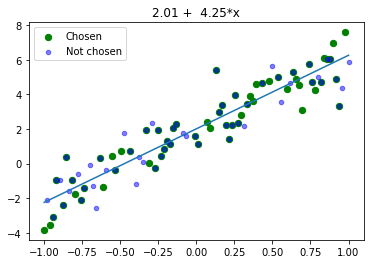

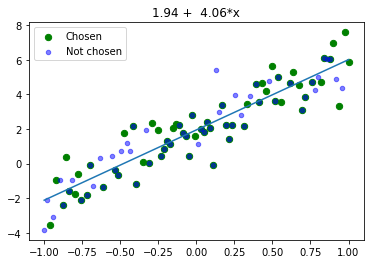

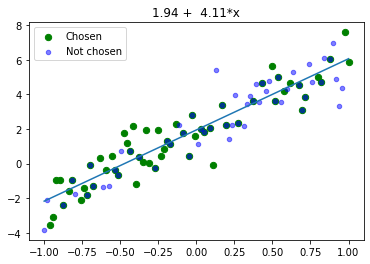

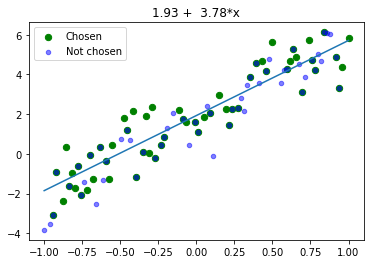

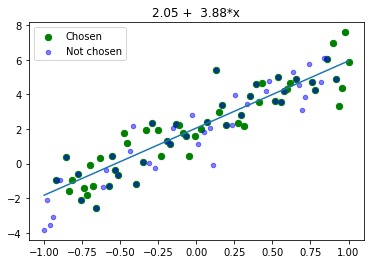

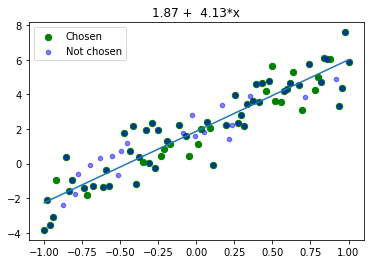

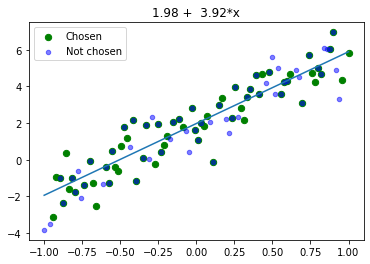

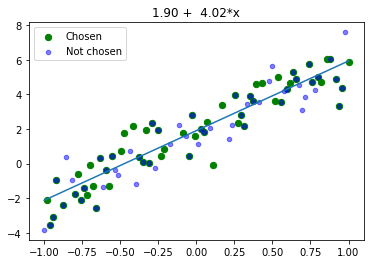

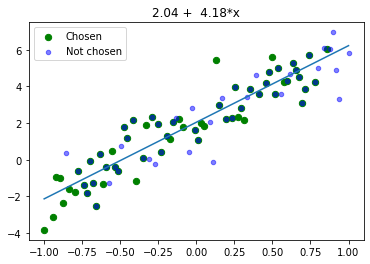

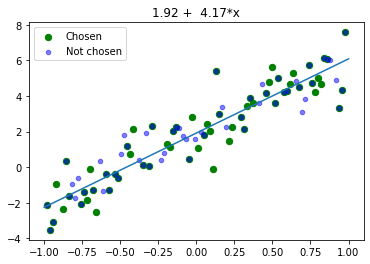

In [6]:
learnt_model = {}
for model_num in range(1000):
    idx = jnp.unique(
        jax.random.choice(
            key=jax.random.PRNGKey(model_num), a=jnp.arange(N), shape=(N,), replace=True
        )
    )
    x_samples = x[idx]
    y_samples = y[idx]
    
    reg = LinearRegression()
    reg.fit(x_samples.reshape(-1, 1), y_samples)
    learnt_model[model_num] = jnp.array([reg.intercept_, reg.coef_[0]])
    
    
    # Plot only every 100th model
    if model_num%100 == 0:
        plt.figure()
        plt.scatter(x_samples, y_samples, color="g", s=40, label="Chosen")
        plt.scatter(x[~idx], y[~idx], color="b", s=20, alpha=0.5, label="Not chosen")

        plt.title(f"{reg.intercept_:0.02f} +  {reg.coef_[0]:0.02f}*x")
        plt.plot(x, reg.predict(x.reshape(-1, 1)))
        plt.legend()
    

In [7]:
df = pd.DataFrame(learnt_model).T
df.columns = ['Theta0', 'Theta1']
df.head()

,Theta0,Theta1
0,2.007029,4.247818
1,1.925932,4.091775
2,1.944000,4.068278
3,1.979439,4.262856
4,1.896393,4.261566


In [8]:
mean_estimates = {}
std_estimates = {}
for i in range(len(df)):
    mean_estimates[i]  = df.head(i+1).mean()
    std_estimates[i]  = df.head(i+1).std()

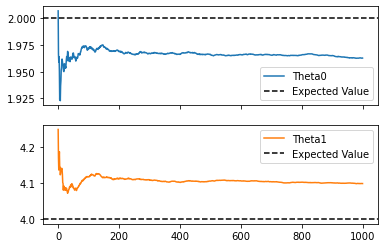

In [9]:
axs = pd.DataFrame(mean_estimates).T.plot(subplots=True)
axs[0].axhline(2, color='k', linestyle='--', label='Expected Value')
axs[0].legend()

axs[1].axhline(4, color='k', linestyle='--', label='Expected Value')
plt.legend()

In [10]:
### Complex true function (f)


f = 0.5*x**4 - 5*x**3 - 3*x**2 + 4*x 
y = f + eps

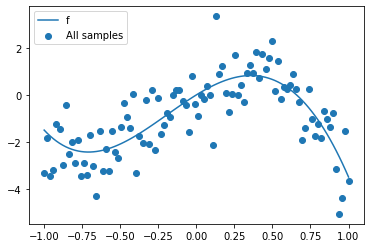

In [11]:
plt.plot(x, f, label='f')
plt.scatter(x, y, label='All samples')
plt.legend()

Let us fit linear models to subsets of the data

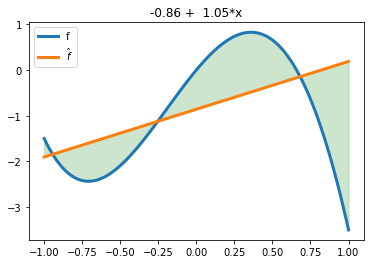

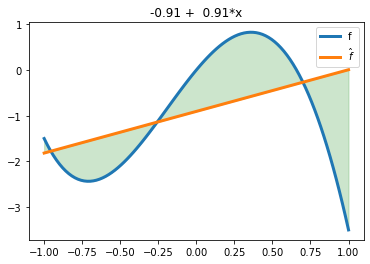

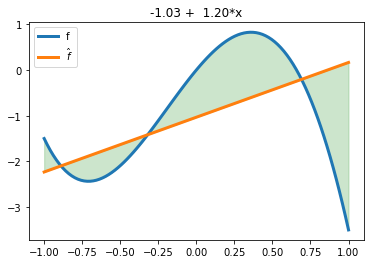

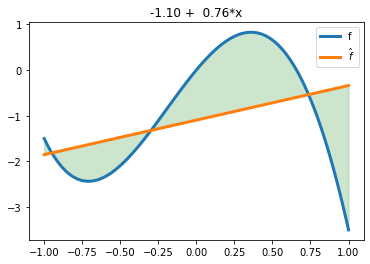

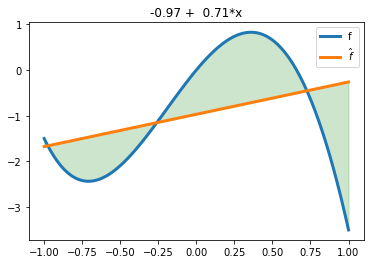

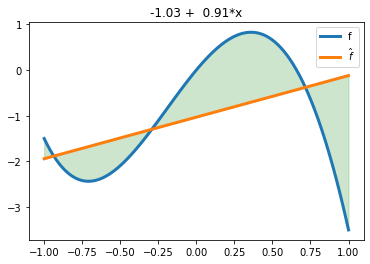

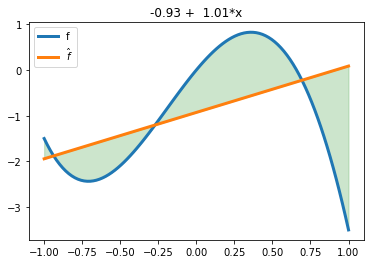

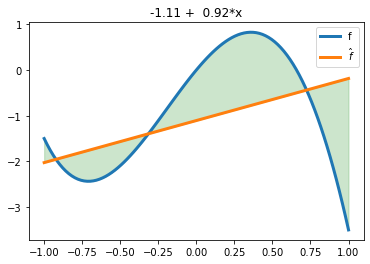

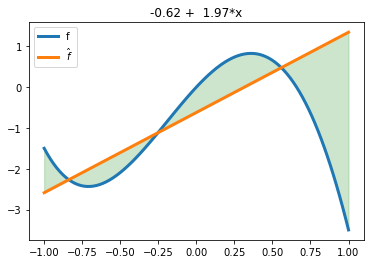

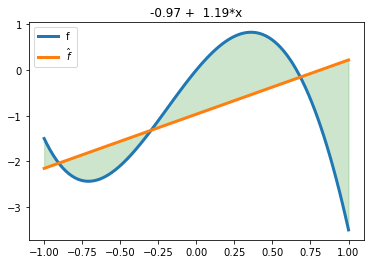

In [12]:
learnt_model = {}
yhats = {}
for model_num in range(1000):

    idx = jnp.unique(
            jax.random.choice(
                key=jax.random.PRNGKey(model_num), a=jnp.arange(N), shape=(N,), replace=True
            )
        )
    x_samples = x[idx]
    y_samples = y[idx]

    reg = LinearRegression()
    reg.fit(x_samples.reshape(-1, 1), y_samples)
    learnt_model[model_num] = jnp.array([reg.intercept_, reg.coef_[0]])
    y_hat = reg.predict(x.reshape(-1, 1))
    yhats[model_num] = y_hat

    if model_num%100==0:
        plt.figure()
        plt.plot(x, f, label='f', lw=3)


        plt.title(f"{reg.intercept_:0.02f} +  {reg.coef_[0]:0.02f}*x")
        
        plt.plot(x, y_hat, lw = 3, label=r'$\hat{f}$')
        plt.legend()

        plt.fill_between(x, f, y_hat, color='g', alpha=0.2)
        plt.legend()

In [13]:
mean_yhat = pd.DataFrame(yhats).mean(axis=1).values
mean_thetas  = pd.DataFrame(learnt_model).mean(axis=1).values


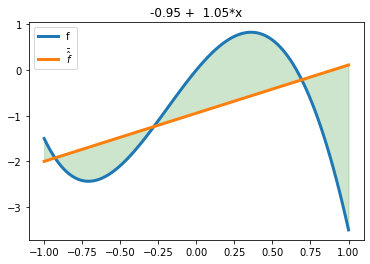

In [14]:
plt.plot(x, f, label='f', lw=3)


plt.title(f"{mean_thetas[0]:0.02f} +  {mean_thetas[1]:0.02f}*x")

plt.plot(x, mean_yhat, lw = 3, label=r'$\bar{\hat{f}}$')
plt.legend()

plt.fill_between(x, f, mean_yhat, color='g', alpha=0.2)
plt.legend()